<a href="https://colab.research.google.com/github/tstef87/IDS/blob/main/HW4/problem1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports 
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#read in the data set
adult_training = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

#print data set
adult_training

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


***Contingency Table:*** In this section I created two concengency tables. the first Workclass vs. Sex. the second sex vs. marital status. I then ploted both tables.

In [3]:
#creating contingencytable
workclass_sex = pd.crosstab(adult_training.workclass, adult_training.sex, margins = True)

#print table 
workclass_sex

sex,Female,Male,All
workclass,,,
?,377,452,829
Federal-gov,149,305,454
Local-gov,377,592,969
Never-worked,1,4,5
Private,3574,6707,10281
Self-emp-inc,54,444,498
Self-emp-not-inc,178,992,1170
State-gov,201,385,586
Without-pay,1,4,5


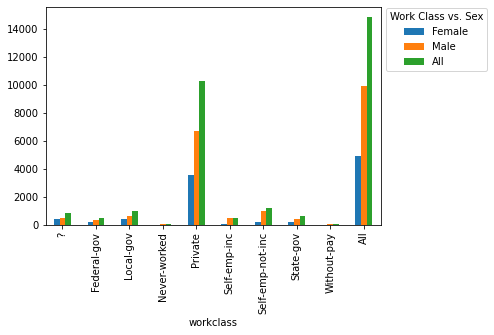

In [4]:
#ploting contingencytable 
wsPlot = workclass_sex.plot(kind = "bar", stacked = False)
wsPlot.legend(title = 'Work Class vs. Sex', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [5]:
#creating contingencytable
sex_marital = pd.crosstab(adult_training.sex, adult_training['marital-status'], margins = True)

#print table 
sex_marital

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
sex,,,,,,,,
Female,1219,7,761,95,2160,290,380,4912
Male,795,4,6010,104,2717,182,73,9885
All,2014,11,6771,199,4877,472,453,14797


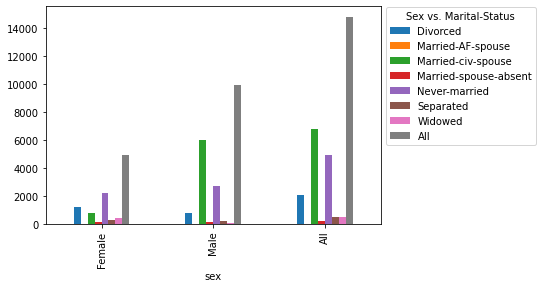

In [6]:
#ploting contingencytable 
smPlot = sex_marital.plot(kind = "bar", stacked = False)
smPlot.legend(title = 'Sex vs. Marital-Status', bbox_to_anchor = (1, 1.02), loc = 'upper left')

***Adult Over 40:*** To make the new dataframe i tool the old data frame and only accepted the data where age was grater than 40. i then constructed another cross table of sex and marital-status. I then ploted the table

In [7]:
#creating condition to see if person is over 40 years of age 
over40 = adult_training.age > 40


In [8]:
#creating contingencytable for over 40
workclass_sex2 = pd.crosstab(adult_training[over40].workclass, adult_training[over40].sex, margins = True)

#print table 
workclass_sex2

sex,Female,Male,All
workclass,,,
?,119,241,360
Federal-gov,83,191,274
Local-gov,198,317,515
Private,1176,2525,3701
Self-emp-inc,30,306,336
Self-emp-not-inc,114,579,693
State-gov,85,178,263
Without-pay,1,1,2
All,1806,4338,6144


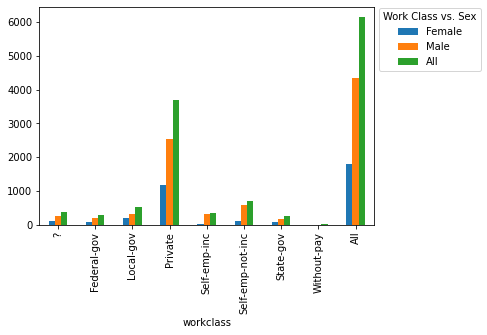

In [9]:
#ploting contingencytable 
wsPlot2 = workclass_sex2.plot(kind = "bar", stacked = False)
wsPlot2.legend(title = 'Work Class vs. Sex', bbox_to_anchor = (1, 1.02), loc = 'upper left')

***Outliers in Education:*** To find the outliers I first made a histogram to display the data trend in education. After that I scaled education and displayed it in a density plot. Finally I applied the three sigma rule to scaled_education and ploted it using a density plot. The plot tells us that most of the outliers zscore are above 3 

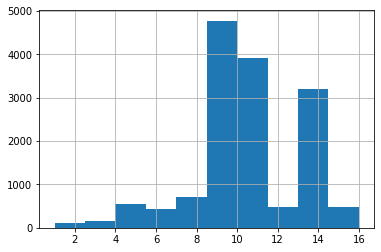

In [10]:
#Identifying Outliers
adult_training.education.hist()

In [11]:
adult_training['education'].describe()

count    14797.000000
mean        10.068798
std          2.598297
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education, dtype: float64

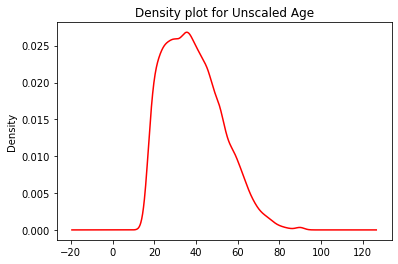

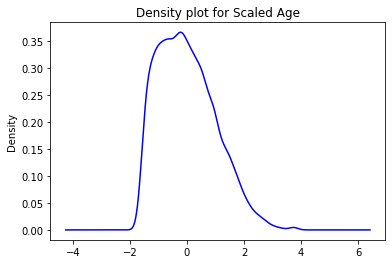

In [ ]:
adult_training['scaled_age'] = stats.zscore(adult_training.age, nan_policy = 'omit')

adult_training.age.plot.density(color = "red")
plt.title('Density plot for Unscaled Age')
plt.show()

adult_training.scaled_age.plot.density(color="blue")
plt.title('Density plot for Scaled Age')
plt.show()


In [ ]:
adult_training['scaled_age'].describe()

count    1.479700e+04
mean     5.678291e-17
std      1.000034e+00
min     -1.585523e+00
25%     -7.813360e-01
50%     -1.233649e-01
75%      6.808219e-01
max      3.751354e+00
Name: scaled_age, dtype: float64

***Standardizing Age:*** Next I moved on to age. I took the same approach as I did in the previous cells. I created scaled_age and with that I applyed the three sigma rule. I then did a density plot and it showed me that there was a huge uptick around the zscore of 3.8. 

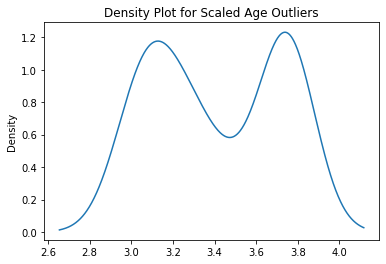

In [ ]:
# Determine the outliers using the three sigma rule for the scaled_age attribute

adult_training_outliers = adult_training.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']

adult_training_outliers.plot.density()
plt.title('Density Plot for Scaled Age Outliers')
plt.show()






***80 and Over:*** Finaly I made a data set of people 80 and over using the same methods i used for over40. I then made a histagram of the data and it showed me that there is a great amount of people in this dataset that are 90 years old. this data does not make sence due to that fact that all other ages in this new data set were declining but for some reason there is a great amount of people at age 90.    

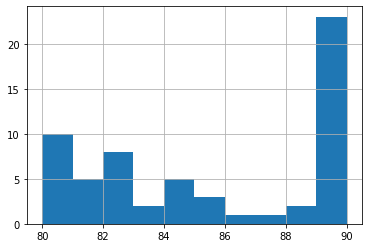

In [12]:
#creating condition to see if person is over 80 years of age 
over80 = adult_training.age >= 80

#over 80 age histgram
adult_training[over80].age.hist()
